In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [7]:
path = 'Dataset/dataset_cat_dog/'
classes = os.listdir(path)
classes

['cats', 'dogs']

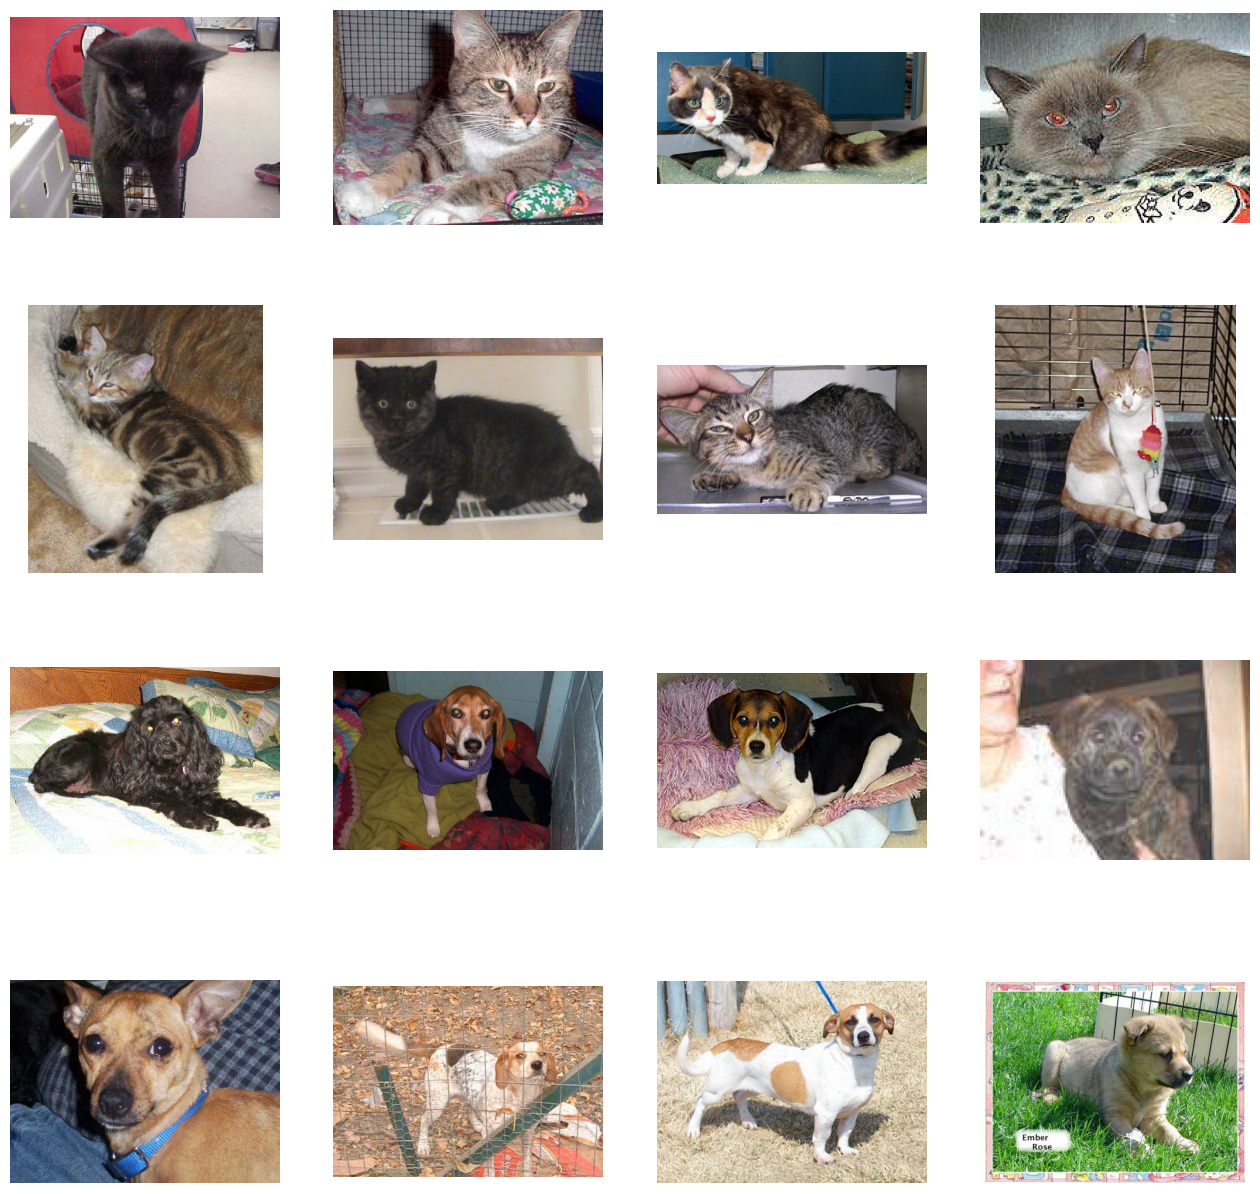

In [10]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('Dataset/dataset_cat_dog/cats/')
dog_dir = os.path.join('Dataset/dataset_cat_dog/dogs/')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()

In [12]:
base_dir = 'Dataset/dataset_cat_dog/'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)


Found 838 files belonging to 2 classes.
Using 755 files for training.
Found 838 files belonging to 2 classes.
Using 83 files for validation.


In [13]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

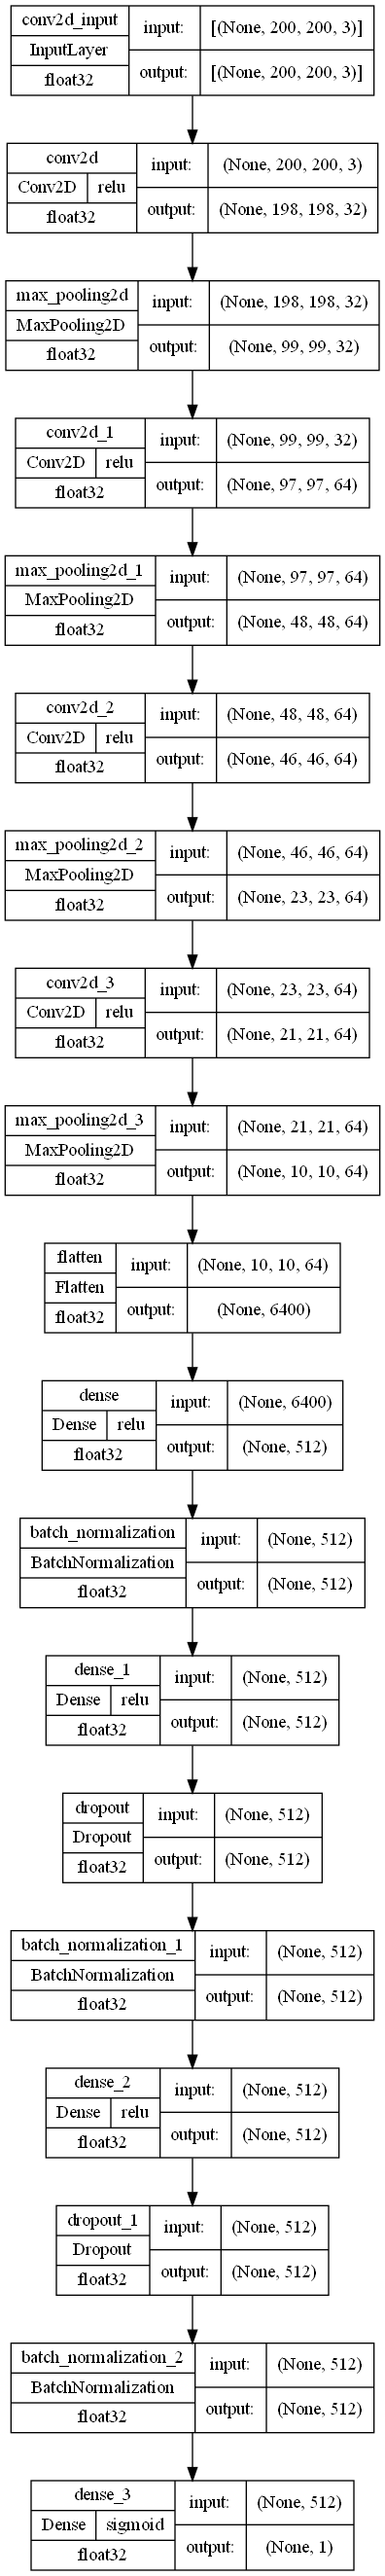

In [15]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)

In [16]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)

In [17]:
history = model.fit(train_datagen,
		epochs=10,
		validation_data=test_datagen)

Epoch 1/10
24/24 [==============================] - 105s 4s/step - loss: 0.8949 - accuracy: 0.5735 - val_loss: 4.7031 - val_accuracy: 0.2892
Epoch 2/10
24/24 [==============================] - 59s 2s/step - loss: 0.7242 - accuracy: 0.6437 - val_loss: 0.6686 - val_accuracy: 0.6386
Epoch 3/10
24/24 [==============================] - 59s 2s/step - loss: 0.6582 - accuracy: 0.6848 - val_loss: 1.1548 - val_accuracy: 0.6747
Epoch 4/10
24/24 [==============================] - 59s 2s/step - loss: 0.5642 - accuracy: 0.7192 - val_loss: 0.6986 - val_accuracy: 0.6265
Epoch 5/10
24/24 [==============================] - 61s 2s/step - loss: 0.4693 - accuracy: 0.7788 - val_loss: 0.7009 - val_accuracy: 0.6627
Epoch 6/10
24/24 [==============================] - 57s 2s/step - loss: 0.4292 - accuracy: 0.8026 - val_loss: 0.6383 - val_accuracy: 0.6867
Epoch 7/10
24/24 [==============================] - 58s 2s/step - loss: 0.3537 - accuracy: 0.8397 - val_loss: 0.8813 - val_accuracy: 0.6024
Epoch 8/10
24/24 [=

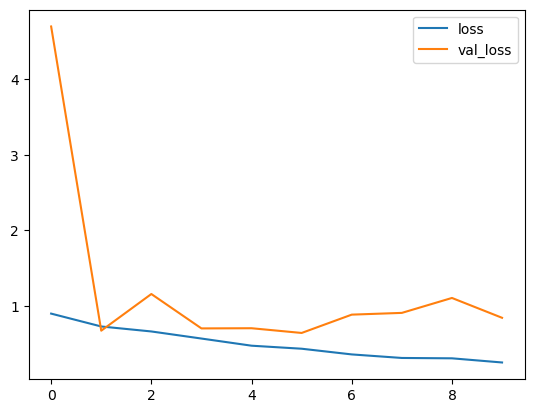

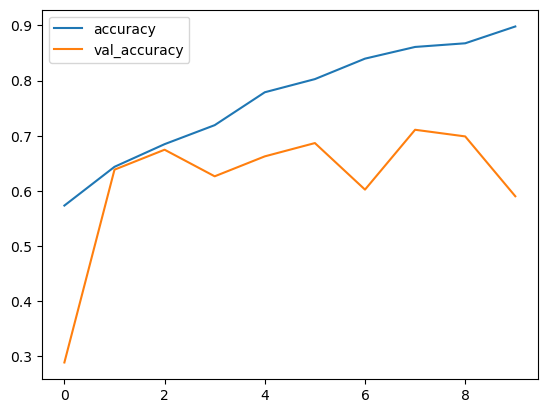

In [18]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 [==============================] - 0s 64ms/step
Cat


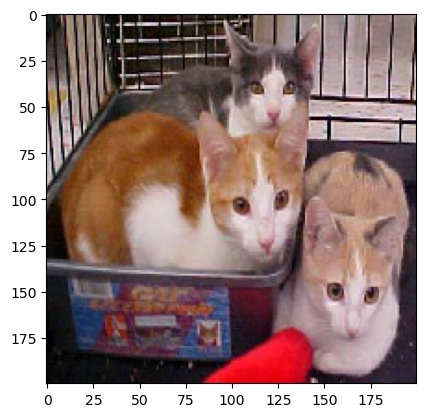

In [25]:
import keras.utils as image

#Input image
test_image = image.load_img('Dataset/dataset_cat_dog/cats/cat.126.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
    print("Dog")
else:
    print("Cat")

1/1 [==============================] - 0s 69ms/step
Dog


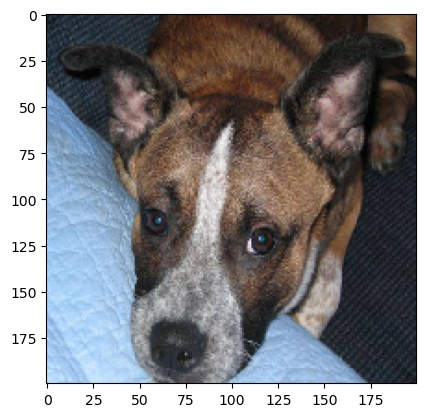

In [26]:
test_image = image.load_img('Dataset/dataset_cat_dog/dogs/dog.156.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
	print("Dog")
else:
	print("Cat")